In [1]:
import pandas as pd
from scorecard import Scorecard
from sklearn.metrics import accuracy_score

In [2]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']

# get data from author = cmavioso
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'cmavioso']
aesthetic_evaluation_data_cmavioso_objective = aesthetic_evaluation_data_cmavioso['Objective Evaluation']
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data_cmavioso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_cmavioso_X = aesthetic_evaluation_data_cmavioso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_cmavioso_y = aesthetic_evaluation_data_cmavioso['Subjective Evaluation']

# get part of the data (first 100 rows of cmavioso)
#objective = aesthetic_evaluation_data_cmavioso_objective[:100]
#X = aesthetic_evaluation_data_cmavioso_X[:100]
#y = aesthetic_evaluation_data_cmavioso_y[:100]
#data = pd.concat([X, y], axis=1)

objective = aesthetic_evaluation_objective
data = aesthetic_evaluation_data.drop(columns=['Image Filename', 'Author', 'Objective Evaluation', 'sX2L Value', 'sX2a Value', 'sX2b Value', 'sX2Lab Value', 'sEMDL Value', 'sEMDa Value', 'sEMDb Value', 'sEMDLab Value'])
X = data.drop(columns='Subjective Evaluation')
y = data['Subjective Evaluation']
data = pd.concat([X, y], axis=1)

# export to csv
data.to_csv('test/og_data_aesthetic_cmavioso100.csv', index=False)

In [3]:
print(f"Number of observations: {len(data)}")
print(f"Number of features: {len(data.columns)}")

print("\ntarget distribution:  ", y.value_counts())

acc = accuracy_score(y, objective)
print(f'Accuracy of old scorecard: {acc}')

Number of observations: 1358
Number of features: 23

target distribution:   Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64
Accuracy of old scorecard: 0.5876288659793815


In [4]:
# get categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    X[col] = X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {X[col].unique()}")

# do a mapping for the ordinal target variable
mapping = {1: 'Poor', 2: 'Fair', 3: 'Good', 4: 'Excellent'}

Categorical columns: []


In [5]:
from scorecard import Scorecard

scorecard = Scorecard()
model, weights = scorecard.fit(X,y,categorical_columns,
              'CAIM', '1_OUT_OF_K', 'ML', None, 
              True, 4, mapping, None, True)

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5707862455326959
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5796049454264465
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5707862455326959
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5796049454264465
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5727470298464213
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5865014971505844
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5756882063170096
testing para

     True Value  Prediction
0             2           2
1             2           2
2             4           3
3             3           2
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           4

[340 rows x 2 columns]
mse:  0.46176470588235297
accuracy:  0.5558823529411765
balanced accuracy:  0.4813925565628889
logistic loss:  0.00639213376971857
number of far off predictions:  14
number of non-zero weights:  Feature    112
Weight      56
dtype: int64
model size (non-zero weights / all weights):  Feature    1.0
Weight     0.5
dtype: float64


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


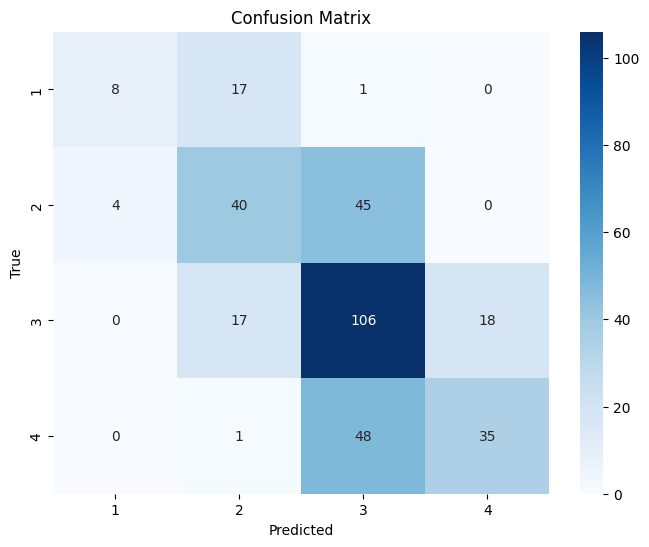

accuracy on train set:  0.6424361493123772
mse on train set:  0.4056974459724951
balanced accuracy on train set:  0.6031982583360685
logistic loss on train set:  0.010176988496814598


In [6]:
scorecard.evaluate()

In [7]:
scorecard.show_scorecard()

          Feature                                           Bin    Points
0       BRA Value        [0.601883875460406, 3.997025532141979[  0.288058
1       BRA Value       [5.918237298308635, 24.075530326533293[  0.123882
2       LBC Value      [0.0004087089954772, 0.4172018007463239[  0.955044
3       LBC Value       [0.4172018007463239, 2.079932905328359[  0.275703
4       LBC Value        [3.924168105752813, 8.815417698806167[ -0.474347
5       UNR Value       [0.0468604951177561, 2.338804814964853[  0.164399
6       BCE Value        [0.002408900783522, 1.786720539932413[  0.756311
7       BCE Value        [3.023930231933728, 6.151450202176021[ -0.670700
8       BCD Value      [0.0068176080106487, 0.1056456544789919[  0.368651
9       BCD Value       [7.274922745301265, 28.071833628579306[ -0.241616
10      BAD Value       [0.9973179550828496, 40.21274933556823[  0.113519
11      BAD Value        [40.21274933556823, 81.96994370665867[  0.189097
12      BOD Value        [92.961225930

split data in train and test sets

In [8]:
from sklearn.model_selection import train_test_split
train_and_val_X, test_X, train_and_val_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

get thresholds with CAIM

In [9]:
import numpy as np
from libraries.caimcaim import CAIMD

def get_thresholds(X, y, use_sbc=True):
    # get indexes of categorical columns
    index_categorical = [X.columns.get_loc(col) for col in categorical_columns]
    #print(f"index categorical features: {index_categorical}")

    # create CAIMD object
    caim = CAIMD(list(categorical_columns))

    # get thresholds
    caim.fit_transform(X, y) # fit() and transform()
    # the print stands for : ' feature_index  GLOBAL CAIM  best_caim_value '

    # get thresholds from caim.split_scheme (dictionary with {column_index: thresholds})
    # transform all values to floats
    # and keys with column indexes to column names 
    index_non_categorical = [i for i in range(X.shape[1]) if i not in index_categorical]
    thresholds = {X.columns[index_non_categorical[i]]: [float(val) for val in values] for i, (key, values) in enumerate(caim.split_scheme.items())}
    #print("thresholds from CAIMD: ", thresholds)

    # for categorical features
    # sort the unique values and make thresholds be the values in between each pair of consecutive values
    #print("'thresholds' for categorical features:")
    for i, col in enumerate(categorical_columns):
        thresholds[col] = np.unique(X[col].astype(str))
        thresholds[col] = list(thresholds[col])
        print(f"  {col}: {thresholds[col]}")

    # reorder thresholds to match the order of columns in X
    if categorical_columns:
        thresholds = {col: thresholds[col] for col in X.columns if col in thresholds}

    # print thresholds
    #print("\nall thresholds ", thresholds)
    #print("number of bins for each feature (num thresholds + 1): ")
    #for i, (key, value) in enumerate(thresholds.items()):
        #if i in index_categorical:
            #print(f"  '{key}': {len(value)}")
        #else:
            # +1 because the number of bins is the number of thresholds + 1
            # e.g. if thresholds are [2, 4, 6], then there are 4 bins: (-inf, 2), [2, 4), [4, 6), [6, inf)
            #print(f"  '{key}': {len(value)+1}")
            
    return thresholds

get encoded version of X with 1 out of k

In [10]:
def get_encoded_X(X, thresholds):
    # encoded version of X
    encoded_X = [] 

    # for each column in X, create a one-hot encoding of the bins, created by thresholds
    for col in X.columns:
        if col in categorical_columns:
            bin = pd.Categorical(X[col], categories=thresholds[col]).codes
            num_bins = len(thresholds[col])
        else:
            bin = np.digitize(X[col], thresholds[col]) # gets bin number of each row
            X[col] = X[col].astype(float)
            num_bins = len(thresholds[col]) + 1
        
        bins_df = pd.get_dummies(bin, prefix=f'feat{col}-bin', prefix_sep='').astype(int) # one hot encoding

        
        # add missing columns (if some bins are not present in the data)
        missing_cols = []
        for i in range(1, num_bins):
            col_name = f'feat{col}-bin{i}'
            if col_name not in bins_df.columns:
                missing_cols.append(pd.Series(0, index=bins_df.index, name=col_name))
        if missing_cols:
            bins_df = pd.concat([bins_df] + missing_cols, axis=1)
        
        # remove first column (bin0)
        bins_df = bins_df.drop(columns=f'feat{col}-bin0', errors='ignore')
        
        bins_df = bins_df.reindex(sorted(bins_df.columns), axis=1)
        
        # add bins of the column to the list
        encoded_X.append(bins_df)
    
    encoded_X = pd.concat(encoded_X, axis=1)

    return encoded_X

get weights for each bin
with grid search
and logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sbc import SBC
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.base import clone
from sklearn.svm import SVC

K = 4  # number of classes in the ordinal target variable

def grid_search_scoring(estimator, X, y, val_X, val_y):
    # learn thresholds from the training data
    thresholds = get_thresholds(X, y)
    
    # if ordinal problem, do sbc to get binary version
    sbc = SBC()
    sbc_X, sbc_y = sbc.reduction(X, y, K, mapping=mapping)
    
    # do thresholds for sbc columns (the last K-2 columns from sbc_X, have one threshold each: 0.5)
    sbc_columns = sbc_X.columns[-(sbc.K-2):]
    for col in sbc_columns:
        thresholds[col] = [0.5]
    
    # get encoded version of training X
    encoded_X = get_encoded_X(sbc_X, thresholds)
    
    # fit the model
    estimator.fit(encoded_X, np.ravel(sbc_y))

    # VALIDATION
    # get sbc version of validation set
    sbc = SBC()
    sbc_val_X, sbc_val_y = sbc.reduction(val_X, val_y, K, mapping=mapping)
    # encode the validation set given the thresholds
    encoded_val_X = get_encoded_X(sbc_val_X, thresholds)
    
    
    # predict with the model
    predictions = estimator.predict(encoded_val_X)
    # tranform predictions to ordinal target
    predictions = sbc.classif(predictions)
    # calculate accuracy
    accuracy = accuracy_score(val_y, predictions)

    return accuracy


def grid_search(model, param_grid, train_and_val_X, train_and_val_y, cv=5):     
    # get combinations of parameters
    param_combinations = list(ParameterGrid(param_grid))
    
    best_score = 0
    best_params = None
    results = []
    
    for params in param_combinations:
        print(f"testing parameters: {params}")
        scores = []
        
        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        for train_index, val_index in kf.split(train_and_val_X):
            train_X, val_X = train_and_val_X.iloc[train_index], train_and_val_X.iloc[val_index]
            train_y, val_y = train_and_val_y.iloc[train_index], train_and_val_y.iloc[val_index]
            
            # clone the model and set parameters
            model = clone(model)
            model.set_params(**params)
            
            score = grid_search_scoring(model, train_X, train_y, val_X, val_y)
            scores.append(score)
        
        mean_score = np.mean(scores)
        results.append((params, mean_score))
        print
        
        if mean_score > best_score:
            best_score = mean_score
            best_params = params

    return best_params, best_score, results
    

# create logistic regression model
#svm = SVC(kernel='linear')
logistic = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)

# find the best parameters with grid search
alpha_values = [0.001]
param_grid = {
    'C': [1/a for a in alpha_values], # inverse of regularization strength
    'class_weight': ['balanced', None]
}

best_params, best_score, results = grid_search(logistic, param_grid, train_and_val_X, train_and_val_y)
# logistic
#best_params = {'C': 1.0, 'class_weight': None}
# svm
# {'C': 8, 'class_weight': None}
best_alpha = 1/best_params['C']

print("ML best parameters: ", best_params)
print("ML best alpha: ", best_alpha)

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
testing parameters: {'C': 1000.0, 'class_weight': None}
ML best parameters:  {'C': 1000.0, 'class_weight': None}
ML best alpha:  0.001


given best parameters, train the model and get the weights

In [12]:
best_model = clone(logistic)
best_model.set_params(**best_params)

# learn thresholds from the training data
thresholds = get_thresholds(train_and_val_X, train_and_val_y)

# if ordinal problem, do sbc to get binary version
sbc = SBC()
sbc_X, sbc_y = sbc.reduction(train_and_val_X, train_and_val_y, K, mapping=mapping)

# do thresholds for sbc columns (the last K-2 columns from sbc_X, have one threshold each: 0.5)
sbc_columns = sbc_X.columns[-(sbc.K-2):]
for col in sbc_columns:
    thresholds[col] = [0.5]

# get encoded version of training X
encoded_X = get_encoded_X(sbc_X, thresholds)

# fit the model
best_model.fit(encoded_X, np.ravel(sbc_y))

# get the weights
weights = best_model.coef_[0]

# show the features and their weights
feature_weights = pd.Series(weights, index=encoded_X.columns)
print("\nFeature weights:")
print(feature_weights)

# get non-zero weights
non_zero_weights = feature_weights[feature_weights != 0]
print("\nNon-zero feature weights:")
print(non_zero_weights)


Feature weights:
featBRA Value-bin1       -0.213622
featBRA Value-bin2        0.326063
featBRA Value-bin3        0.078600
featBRA Value-bin4        0.515184
featBRA Value-bin5       -0.952502
                            ...   
featcEMDLab Value-bin3   -2.236187
featcEMDLab Value-bin4    0.166924
featcEMDLab Value-bin5    1.000020
featsbcol1-bin1          -3.960348
featsbcol2-bin1          -7.078806
Length: 112, dtype: float64

Non-zero feature weights:
featBRA Value-bin1       -0.213622
featBRA Value-bin2        0.326063
featBRA Value-bin3        0.078600
featBRA Value-bin4        0.515184
featBRA Value-bin5       -0.952502
                            ...   
featcEMDLab Value-bin3   -2.236187
featcEMDLab Value-bin4    0.166924
featcEMDLab Value-bin5    1.000020
featsbcol1-bin1          -3.960348
featsbcol2-bin1          -7.078806
Length: 111, dtype: float64


In [13]:
# evaluate the model on the test set
sbc_test_X, sbc_test_y = sbc.reduction(test_X, test_y, K, mapping=mapping)
encoded_test_X = get_encoded_X(sbc_test_X, thresholds)

# predict with the model
test_predictions = best_model.predict(encoded_test_X)
# transform predictions to ordinal target
test_predictions = sbc.classif(test_predictions)
# calculate accuracy on the test set
test_accuracy = accuracy_score(test_y, test_predictions)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.5352941176470588
